In [2]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv("C://Users//USER//Documents//Flipkart_Mobiles.csv")

In [5]:
# Display the first few rows of the dataset
df.head()

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price
0,OPPO,A53,Moonlight Black,4 GB,64 GB,4.5,11990,15990
1,OPPO,A53,Mint Cream,4 GB,64 GB,4.5,11990,15990
2,OPPO,A53,Moonlight Black,6 GB,128 GB,4.3,13990,17990
3,OPPO,A53,Mint Cream,6 GB,128 GB,4.3,13990,17990
4,OPPO,A53,Electric Black,4 GB,64 GB,4.5,11990,15990


In [6]:
# Check for missing values and data types
print(df.isnull().sum())
print(df.dtypes)

Brand               0
Model               0
Color               0
Memory             43
Storage            39
Rating            144
Selling Price       0
Original Price      0
dtype: int64
Brand              object
Model              object
Color              object
Memory             object
Storage            object
Rating            float64
Selling Price       int64
Original Price      int64
dtype: object


In [7]:
# Drop irrelevant columns and handle missing values
df.drop(['Original Price'], axis=1, inplace=True)
df.dropna(inplace=True)

In [8]:
# Convert 'Memory' and 'Storage' to numeric
df['Memory'] = df['Memory'].str.extract('(\d+)').astype(float)
df['Storage'] = df['Storage'].str.extract('(\d+)').astype(float)

In [9]:
# Feature selection and scaling
features = df[['Memory', 'Storage', 'Rating', 'Selling Price']]
features_standardized = (features - features.mean()) / features.std()


In [10]:
# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(features_standardized)

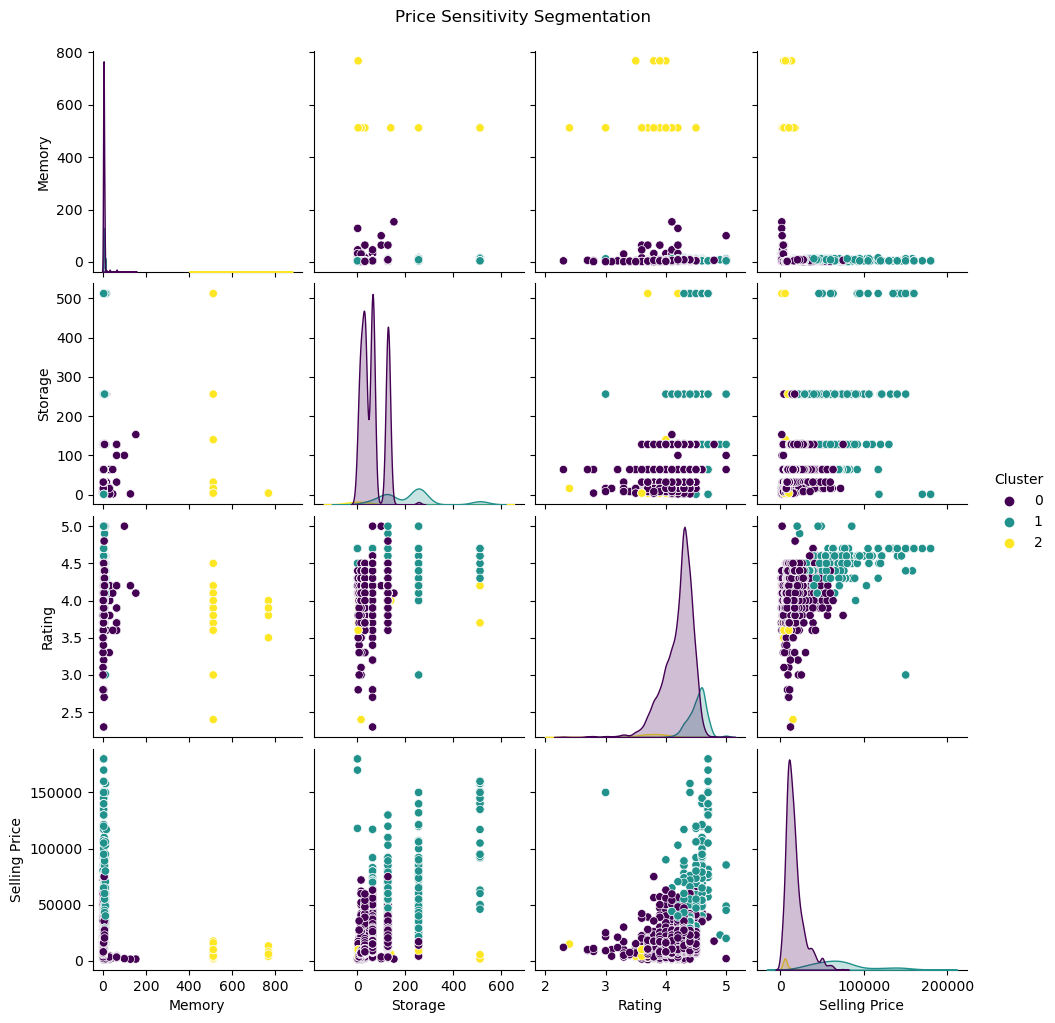

In [11]:
# Visualize Clusters
sns.pairplot(df, vars=['Memory', 'Storage', 'Rating', 'Selling Price'], hue='Cluster', palette='viridis')
plt.suptitle('Price Sensitivity Segmentation', y=1.02)
plt.show()

In [12]:
# Display cluster characteristics
cluster_characteristics = df.groupby('Cluster').mean()
print(cluster_characteristics)

             Memory     Storage    Rating  Selling Price
Cluster                                                 
0          4.786628   62.271564  4.203426   16583.592241
1          5.976303  220.981043  4.516351   73513.798578
2        541.538462   32.038462  3.775000    6332.365385


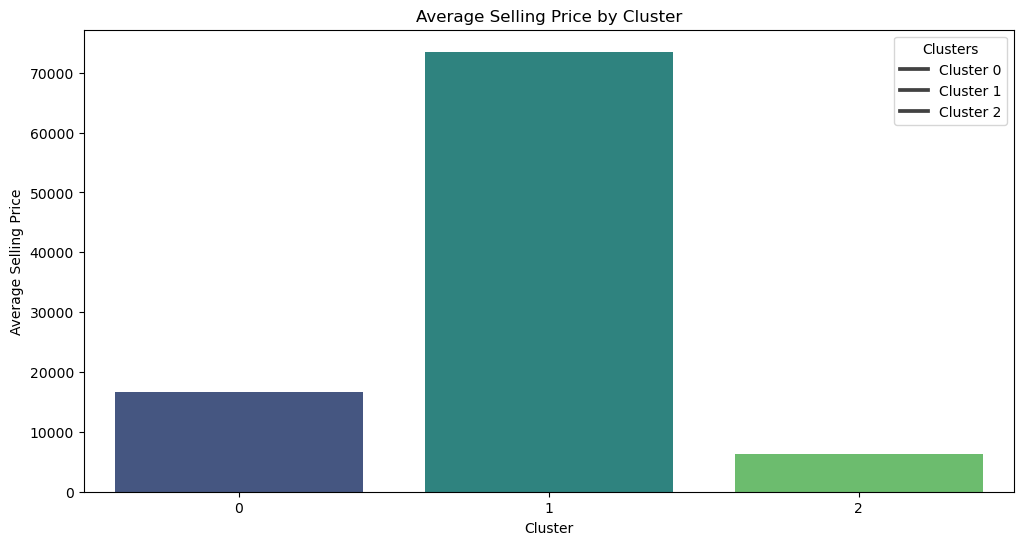

In [13]:
# Additional visualizations for cluster characteristics with keys for interpretation
plt.figure(figsize=(12, 6))
sns.barplot(x=cluster_characteristics.index, y='Selling Price', data=cluster_characteristics, palette='viridis')
plt.title('Average Selling Price by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Selling Price')
plt.legend(title='Clusters', labels=['Cluster 0', 'Cluster 1', 'Cluster 2'])
plt.show()

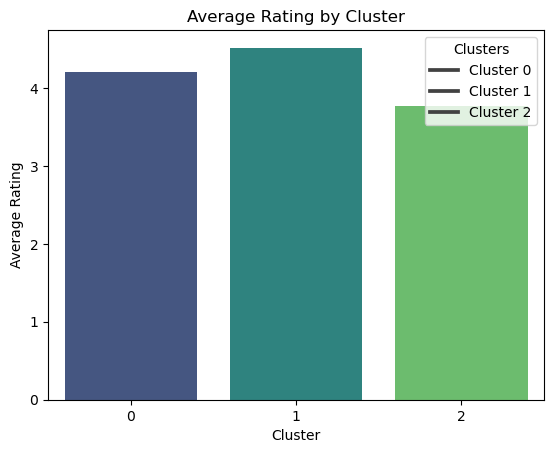

In [14]:
sns.barplot(x=cluster_characteristics.index, y='Rating', data=cluster_characteristics, palette='viridis')
plt.title('Average Rating by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Rating')
plt.legend(title='Clusters', labels=['Cluster 0', 'Cluster 1', 'Cluster 2'])
plt.show()

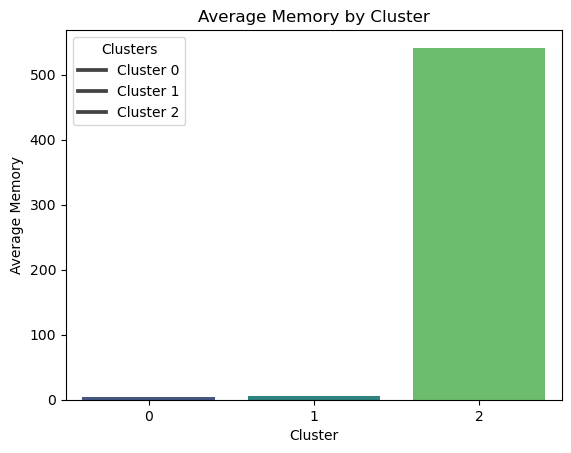

In [15]:
sns.barplot(x=cluster_characteristics.index, y='Memory', data=cluster_characteristics, palette='viridis')
plt.title('Average Memory by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Memory')
plt.legend(title='Clusters', labels=['Cluster 0', 'Cluster 1', 'Cluster 2'])
plt.show()

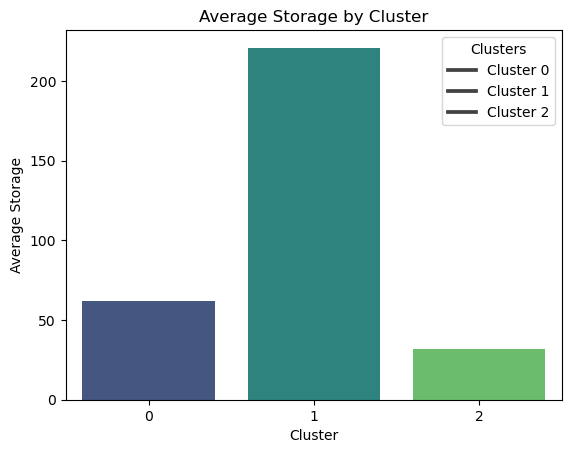

In [16]:
sns.barplot(x=cluster_characteristics.index, y='Storage', data=cluster_characteristics, palette='viridis')
plt.title('Average Storage by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Storage')
plt.legend(title='Clusters', labels=['Cluster 0', 'Cluster 1', 'Cluster 2'])
plt.show()

In [28]:
import numpy as np

# Calculate percentage change in Selling Price and Rating
df['Price Change'] = df['Selling Price'].pct_change()
df['Rating Change'] = df['Rating'].pct_change()

# Drop NaN values resulting from the percentage change calculation
df.dropna(subset=['Price Change', 'Rating Change'], inplace=True)

# Calculate Elasticity of Demand
df['Elasticity'] = df['Rating Change'] / df['Price Change']

# Handle any infinite or NaN values in Elasticity
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(subset=['Elasticity'], inplace=True)

# Calculate the average elasticity for each cluster
average_elasticity_by_cluster = df.groupby('Cluster')['Elasticity'].mean()

# Fill NaN values with 0 if a cluster has no valid elasticity calculation
average_elasticity_by_cluster.fillna(0, inplace=True)

# Display the result in the specified format
for cluster in average_elasticity_by_cluster.index:
    print(f"Cluster {cluster}: Price Elasticity of Demand = {average_elasticity_by_cluster[cluster]:.2f}")


Cluster 0: Price Elasticity of Demand = -0.00
Cluster 1: Price Elasticity of Demand = 0.11
Cluster 2: Price Elasticity of Demand = 2.21
